## **WP-SN-3**


**Organization of the work**

Our job was to finalize SN work and with the CMB team to get an approximation of the possibles cosmological constants. First, we had to fit the lightcurves of supernovae in order to obtain the distance modulus for each of them (taking into account redshift and brighter-slower effect). Then we built a graph of distance modulus as a function of redshift, with a log scale for the x-axis, and compared it to canonical models. Finally we were able to approach the values of cosmological constant we were looking for.

### **I. Importation of data and packages**

The trick here is to be aware that the supernova are not sort by their number in the file.

In [ ]:

#### Reading file from Google Drive
!pip install PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

##### For Data-LightCurves (WP-SN-3):
download = drive.CreateFile({'id': '1Ih8AQsMCmSESWytcztyJKGVvnP_-VAsC'})
download.GetContentFile('Data-LightCurves.tgz')
!tar zxvf Data-LightCurves.tgz

download_mag = drive.CreateFile({'id': '158CYzUijoICCIGfSc2YjAg_tJDcCAsa8'})
download_mag.GetContentFile('magnitudes.txt')
!ls -lrt

download_red = drive.CreateFile({'id': '1m7-JZeKGqn_kBPYBCOgkAPWxOS4jFcmV'})
download_red.GetContentFile('Data-Search-SNe.xlsx')
!ls -lrt

./._Data-LightCurves
Data-LightCurves/
Data-LightCurves/EI2019-Data-LightCurves-SN-130_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-125_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-35_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-20_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-51_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-44_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-141_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-59_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-149_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-5_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-138_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-28_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-27_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-32_lightcurve.txt
Data-LightCurves/EI2019-Data-LightCurves-SN-122_lightcurve.txt
Data-LightCurves/EI2019-Da

In [ ]:
#### Some usual imports
from pylab import *
from matplotlib import rc
%matplotlib inline
rc('figure',figsize=(17,10))
rc('font',size=12)
rc('text',usetex=False)
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import logging
import cmath as cm
import math
import random
import scipy
from scipy.stats import norm
from astropy.io import fits
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import glob



### **II. Observation of provided data**

Let's plot the average lightcurve to remind us its shape.

[-19.8662057  -19.03128781 -17.81469317 -16.18530683 -14.95315471
 -13.34243734 -11.76283492 -10.20812446  -8.66897148  -7.15159896
  -4.90509939  -2.29559205   0.           3.60587727   5.79636992
   7.97441659  10.52169404  12.32428695  15.23457217  17.77562662
  19.9505618   22.49783924  24.31287813  26.12169404  29.04753673
  31.60726016  34.9147796   39.69922213  45.22212619  50.00345722
  55.16024201  61.04926534  67.31063094  74.30734659  81.30717373
  87.56542783  93.82679343 100.4573898  106.71564391 111.87554019
 119.61071737 125.49974071 133.60103717 142.44079516 152.0127917 ] [-13.16067416 -13.77022472 -14.45842697 -15.42191011 -16.20842697
 -17.05393258 -17.70280899 -18.19438202 -18.58764045 -18.84325843
 -19.03988764 -19.19719101 -19.2        -19.15786517 -19.0005618
 -18.76460674 -18.52865169 -18.25337079 -17.97808989 -17.70280899
 -17.44719101 -17.21123596 -17.01460674 -16.77865169 -16.60168539
 -16.44438202 -16.34606742 -16.24775281 -16.1494382  -16.03146067
 -15.95280

Text(0, 0.5, ' - Absolute magnitude')

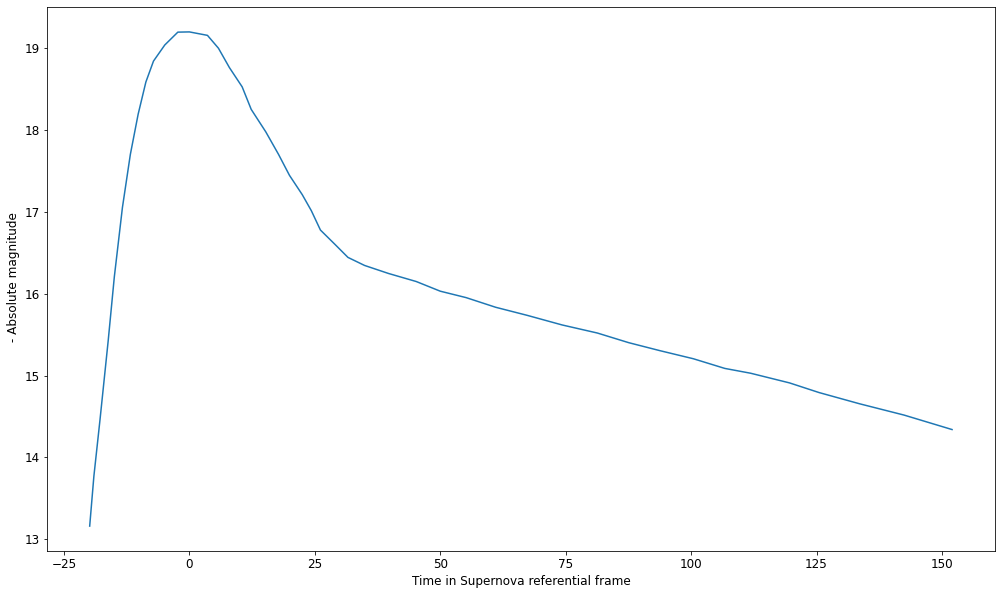

In [ ]:
t0, mag0 = np.loadtxt('Data-LightCurves/EI2019-Data-LightCurves-SN-SNI-Average_LightCurve.txt').T


print(t0, mag0)

plot(t0,-mag0)
xlabel('Time in Supernova referential frame')
ylabel(' - Absolute magnitude')


This does not account for the brighter-slower empirical law that states that the magnitude reduces by 1.52 times the difference of the time stretch factor w.r.t one.

With the following small piece of code, we create a class to account for the stretch factor and correct for the brighter-slower effect. The plot is focused on the maximum and take a large gap of stretch factor to have a look on its role.

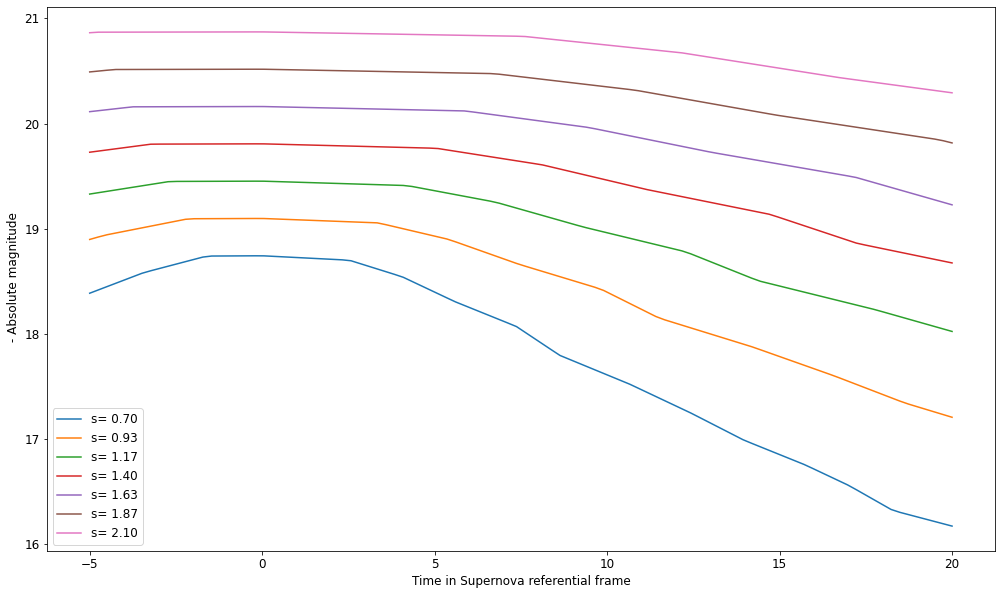

In [ ]:
class SNIaLightCurve:
    def __init__(self, data):
        self.data = data
        self.t0 = 0.  
    def __call__(self,t,s, z=0):
      return np.interp(t, (self.data[:,0])*s*(z+1), self.data[:,1], left=0,right=0) - 1.52*(s-1)   

      #We modified the class to take the redshift effect into account
      
lc = SNIaLightCurve(np.array([t0,mag0]).T)

svals = np.linspace(0.7, 2.1, 7)

ttt = np.linspace(-5, 20, 100)

for i in range(len(svals)):
  plot(ttt, -lc(ttt,svals[i], 0), label='s={0:5.2f}'.format(svals[i]))

xlabel('Time in Supernova referential frame')
ylabel(' - Absolute magnitude') 
legend()

Let's now work on untreated data of lightcurve of supernova, we will extract their apparent magnitude (with the error linked) depending of the time in the Supernova referantial frame and the redshift linked to each Supernova.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

0.8669679435879547


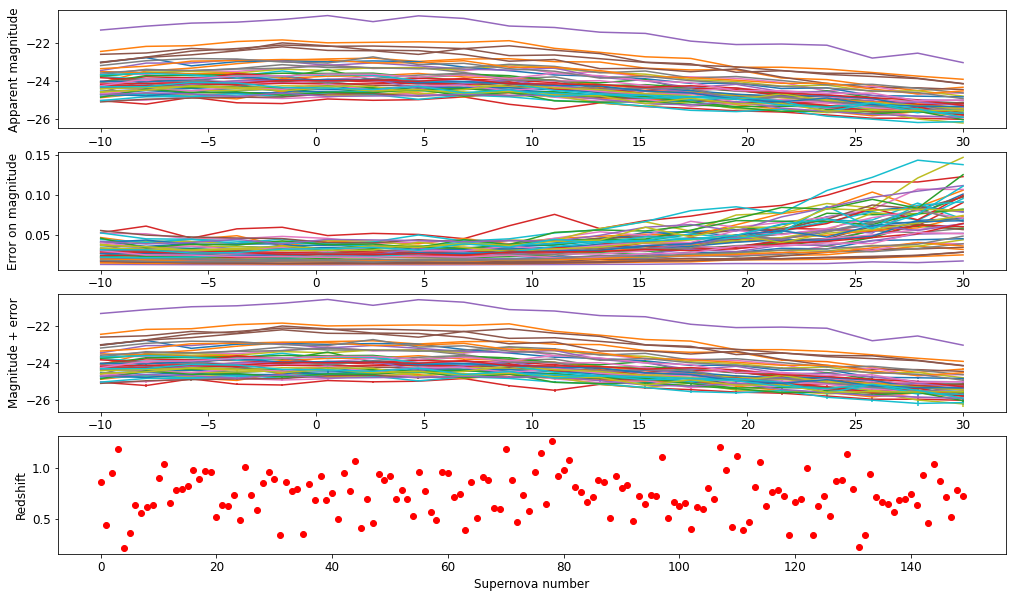

In [ ]:
#Affichage des données brutes : 

from os import walk
mag = {}
t = {}
err = {}
for (repertoire, sousRepertoires, fichiers) in walk('Data-LightCurves'):
    for fichier in fichiers:
      if fichier == 'EI2019-Data-LightCurves-SN-SNI-Average_LightCurve.txt' or fichier == 'EI2019-Data-LightCurves-SN-Redshifts.txt':
        continue

      name = fichier
      bla = str.split(name,'_')
      parts = str.split(bla[0], '-')
      number = int(parts[-1])

      mag[number] = np.loadtxt(repertoire + '/' + fichier).T[1]
      err[number] = np.loadtxt(repertoire + '/' + fichier).T[2]
      t[number] = np.loadtxt(repertoire + '/' + fichier).T[0]

subplot(4,1,1)
ylabel('Apparent magnitude')
  
subplot(4,1,2)
ylabel('Error on magnitude')

xlabel('Time in Supernova referential frame')

subplot(4,1,3)
ylabel('Magnitude + error')

xlabel('Time in referential frame')

subplot(4,1,4)
xlabel('Supernova number')
ylabel('Redshift')



for i in range(0,50):
  subplot(4,1,1)
  plot(t[i], -mag[i])
  subplot(4,1,2)
  plot(t[i], err[i])  

  subplot(4,1,3)
  errorbar(t[i], -mag[i],yerr=err[i])

z = np.loadtxt('Data-LightCurves/EI2019-Data-LightCurves-SN-Redshifts.txt')
subplot(4,1,4)
plot(z, 'ro')


print(z[0] )

To have a look on the uncertainty impact, let's plot the lightcurve of the first supernova in the file. As we can see in the second plot before, the uncertainty is growing with time.

[0.03637539 0.03458703 0.03307861 0.03545101 0.03342833 0.03386223
 0.03477728 0.0344291  0.02992659 0.03461579 0.03742378 0.04257623
 0.05309515 0.05377583 0.0483202  0.06285042 0.06903113 0.06590944
 0.07548399 0.10095973]


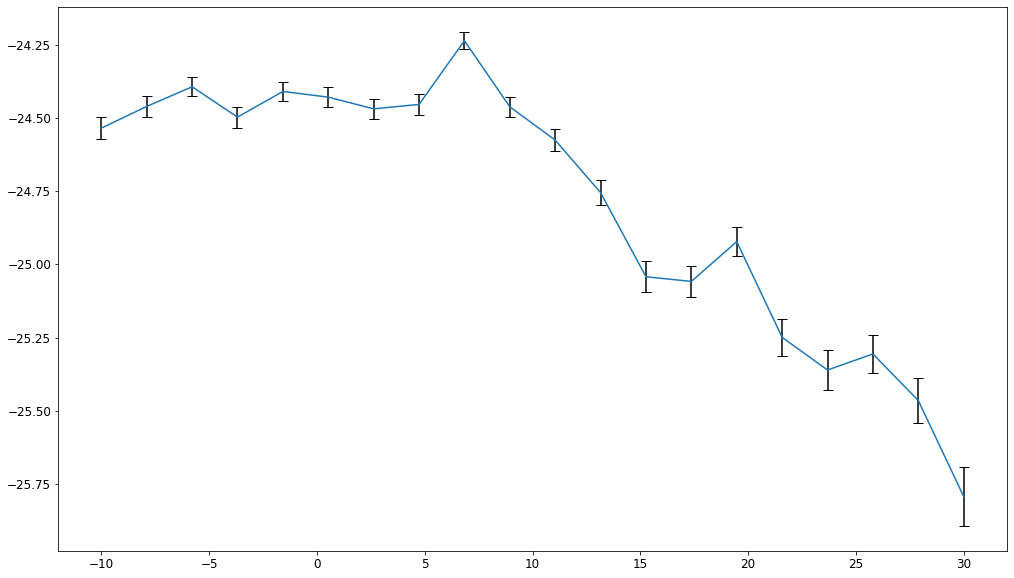

In [ ]:
t_ini, mag_ini, e = np.loadtxt('Data-LightCurves/EI2019-Data-LightCurves-SN-0_lightcurve.txt').T

plt.plot(t_ini, -mag_ini)
plt.errorbar(t_ini, -mag_ini, yerr = e, fmt = 'none', ecolor ='black', capsize = 5)
print(e)

### **III. Optimization of the features of the lightcurve model to the Supernova**

First of all we import the package Minuit that will help us for the optimization.

In [ ]:
#Code Minuit

from pylab import *
import numpy as np
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(10,5))
rc('font',size=12)
rc('text',usetex=False)
!pip install pymc
!pip install iminuit
!rm -rf cosmolib.py*
!wget --no-check-certificate https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/cosmolib.py
import cosmolib as cs



--2020-06-12 09:52:50--  https://raw.githubusercontent.com/jchamilton75/CS-ST4-Cosmo-2020/master/cosmolib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14518 (14K) [text/plain]
Saving to: ‘cosmolib.py’

cosmolib.py         100%[===================>]  14.18K  --.-KB/s    in 0.01s   

2020-06-12 09:52:50 (1.43 MB/s) - ‘cosmolib.py’ saved [14518/14518]



Now we have to find the pamaters (call pars) that fit the best with the model, Minuit will return the values and the uncertainties (covariance matrix). Doing the procedure on the fifth first supernova let us have an idea of the order of magnitude.

In [ ]:
#Fitting avec Minuit

result=150*[0]
def fun_to_fit(x, pars):
    values = pars[0] - lc(x - pars[2], pars[1] , z[i] )
    return values

for i in range(0, 150):
  try:
    guess = np.array([-40., 1., 0.]) #Initial guess that roughly follows the mean values of the data parameters
    result[i] = (cs.do_minuit(t[i], - mag[i], err[i], guess, functname=fun_to_fit))
    print(result[i])
  except:
    continue

print('Fin des résultats')



Fitting with Minuit
Chi2= 99.98466924701484
ndf= 17
(<iminuit._libiminuit.Minuit object at 0x74fb918>, array([-43.63931954,   1.03520504,  -0.14898234]), array([0.00939516, 0.00133507, 0.02012003]), array([[ 8.82690659e-05, -3.06029387e-06,  3.15938777e-05],
       [-3.06029387e-06,  1.78241134e-06, -1.98783088e-05],
       [ 3.15938777e-05, -1.98783088e-05,  4.04815471e-04]]))
Fitting with Minuit
Chi2= 330.8213034626787
ndf= 17
(<iminuit._libiminuit.Minuit object at 0x74fa718>, array([-41.956395  ,   0.94785599,   4.60367863]), array([0.01306893, 0.00534988, 0.05525751]), array([[ 1.70796975e-04, -6.59535576e-05, -1.92829511e-04],
       [-6.59535576e-05,  2.86212483e-05,  8.24819873e-05],
       [-1.92829511e-04,  8.24819873e-05,  3.05339234e-03]]))
Fitting with Minuit
Chi2= 229.3662571565604
ndf= 17
(<iminuit._libiminuit.Minuit object at 0x7882c18>, array([-43.46626168,   2.0054236 , -77.44129944]), array([0.00913972, 0.00041244, 0.01688676]), array([[ 8.35345417e-05, -4.42617546e-0

Thus we the feature we obtain we could plot the j first supernova data (by default j = 50) with the correction we got (brighter-slower, redshift) :

We may note, since minuit is very sensitive to initial parameters, that some curves don't fit quite well : this is due to a misadjustment of the initial guess for the 3rd variable (time at maximum)

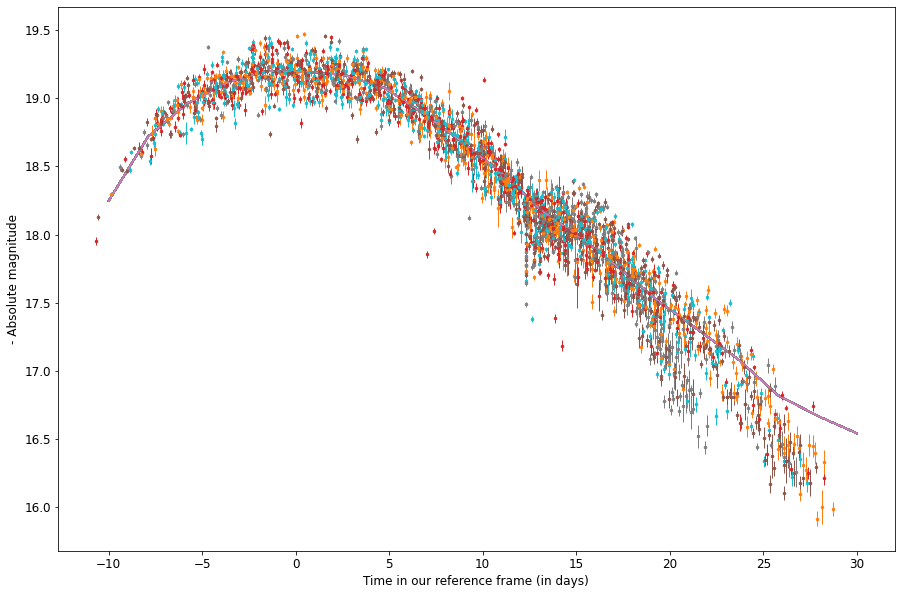

In [ ]:
#Affichage des courbes

j = 150

trash_values = []

plt.figure(figsize=(15,10))
plt.xlabel('Time in our reference frame (in days)')
plt.ylabel('- Absolute magnitude')

for i in range(0, 150):

  if type(result[i]) == int or max((t[i] - result[i][1][2])/((z[i]+1)*result[i][1][1])) > 30 :
    trash_values.append(i)
    continue
  
  path =r"Data-LightCurves/EI2019-Data-LightCurves-SN-"+str(i)+"_lightcurve.txt"
  tp, magp, errp = np.loadtxt(path).T
  plot(t[i], -lc(t[i], 1) )
  
  errorbar((t[i] - result[i][1][2])/((z[i]+1)*result[i][1][1]), -mag[i]-result[i][1][0] - 1.52*(result[i][1][1]-1),yerr = errp, fmt='.', markersize=5, elinewidth=1) #taille des points modifiable dans markersize pour la clarté


Even if the fitting seems satisfying, our precedent method didn't provide convenient results, thus we made the optimization with scipy.

Scipy provide tools for non-linear optimization that relies less on an initial guess, which was the main issue we experienced with Minuit.

In [ ]:
#Approximation avec scipy

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

result_opt=[]
result_min=[]
error = []

j = 150 #Number of supernovas to fit

def fun_to_fit(x, par0, par1, par2):
  return (par0 - lc(x-par2, par1, z[i]) ) #Par0 : distance modulus, par1 : scale factor, par2 : time at maximum

for i in range(0, j):
  
  result_opt.append(curve_fit(fun_to_fit, t[i], -mag[i]))
  
  print("Supernova n°{}".format(i))
  print("Parameters value (distance modulus, scale factor, time at maximum) : ")
  print(result_opt[i][0])
  print("Covariance matrix with parameters in the same order : ")
  print(result_opt[i][1])


Supernova n°0
Parameters value (distance modulus, scale factor, time at maximum) : 
[-43.64739758   1.03651973  -0.50790043]
Covariance matrix with parameters in the same order : 
[[ 0.01411725 -0.00724567  0.07353478]
 [-0.00724567  0.00396276 -0.04699233]
 [ 0.07353478 -0.04699233  1.03312841]]
Supernova n°1
Parameters value (distance modulus, scale factor, time at maximum) : 
[-41.93419728   0.9340955    4.53348279]
Covariance matrix with parameters in the same order : 
[[ 0.00465223 -0.00155501 -0.00513676]
 [-0.00155501  0.00058515  0.00181708]
 [-0.00513676  0.00181708  0.06374263]]
Supernova n°2
Parameters value (distance modulus, scale factor, time at maximum) : 
[-43.7120999    1.09273398  -3.49054842]
Covariance matrix with parameters in the same order : 
[[ 0.01658671 -0.00959079  0.14903958]
 [-0.00959079  0.00601423 -0.10848118]
 [ 0.14903958 -0.10848118  2.72810026]]
Supernova n°3
Parameters value (distance modulus, scale factor, time at maximum) : 
[-44.27559414   1.0431

Once the fitting is done, we can plot the corrected lightcurves.

The result is quite satisfying : we have corrected the initial condition sensitivity issues.

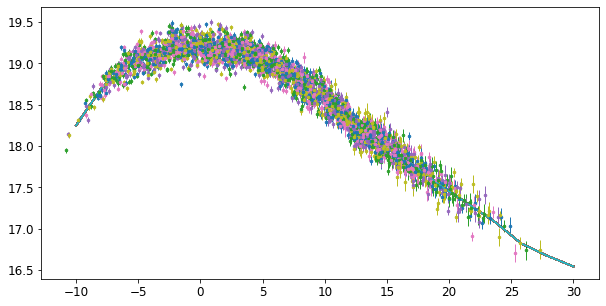

In [ ]:
for i in range(0, 150):
  t_corr = (t[i]-result_opt[i][0][2])/((z[i]+1)*(result_opt[i][0][1])) #Time corrected for redshift, scale and time at maximum effects of the supernovae
  mag_corr = -mag[i]-result_opt[i][0][0] - 1.52*(result_opt[i][0][1]-1) #Magnitude corrected for redshift, scale and time at maximum effects of the supernovae

  #We inverse here the relation to plot the apparent curves on the absolute mean curve

  errorbar(t_corr , mag_corr, yerr = errp, fmt='.', markersize=5, elinewidth=1)

  #We also plot the curve of the average magnitude

  plot(t[i], -lc(t[i], 1) )



To evaluate the bias on the global fitting we plot the mean of the values of the curves of the supernovas on the average lightcurve.

We also plot the bias on our measures.

Biais sur mesure : 0.006600504479963112


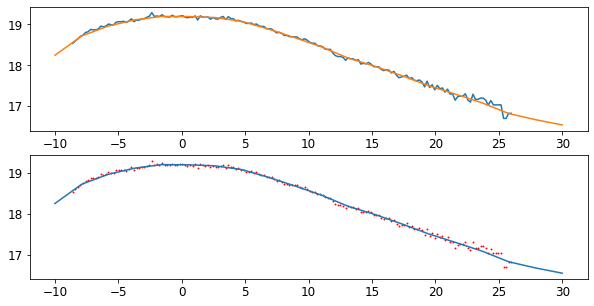

In [ ]:
#Here we calculate the mean of the values of the curves of the supernovas

delta=200 #Number of intervals

dt = linspace(-10, 30, delta) #Time interval for calculation

bin = {} #Contains the mean value at a time t

for i in range(0, j):
  for j in range(0, len(t[i])):
    dti = floor(((t[i][j]-result_opt[i][0][2])/((z[i]+1)*(result_opt[i][0][1])) + 10)*delta/40) #We get the index of dt corresponding to the corrected time on the curve

    if dti not in bin:
      bin[dti] = [-mag[i][j]-result_opt[i][0][0] - 1.52*(result_opt[i][0][1]-1), 1] #We create a bin if we don't know any previous value at a time dti
      
    else:
      bin[dti][0] = (-mag[i][j]-result_opt[i][0][0] - 1.52*(result_opt[i][0][1]-1) + bin[dti][0]*bin[dti][1])/(1+bin[dti][1]) #We update the previous value and calculate the mean
      bin[dti][1] += 1 #We update the number of data that is used for calculating bin[dti] (used to make a mean)

liste = delta*[0]

for i in range(0,delta): #We complete the time gap for intermediate values that weren't listed previously
  if i in bin:
    liste[i] = bin[i][0]
  else:
    if i != 0:
      liste[i] = liste[i-1]
    else:
      liste[i] = 0


subplot(2,1,1)  
plot(dt[7:-20], array(liste[7:-20])) #To plot a continuous line of the results
plot(t[0], -lc(t[0], 1) )


subplot(2,1,2)
plt.scatter(dt[7:-20], array(liste[7:-20]), c = 'red', s=0.8) #To plot a scattered line of the results
plot(t[0], -lc(t[0], 1) )


bias = 0
for k in range(0, len(dt)-20): #Calculate the bias on the result
  if liste[k] == 0 or lc(dt[k],1) == 0:
    continue

  bias += (liste[k]+lc(dt[k], 1))
  

print("Biais sur mesure : " + str(bias/(len(dt) - 43)))


### **IV. Curve of distance modulus as a fonction of redshift**

Now we have obtained satisfactory results, let's put them into a list and an array to process them.

In [ ]:
#Liste Redshift,Moduli
modulist=150*[0]
for i in range(0, 150):
  
  modulist[i]=[result_opt[i][0][0], z[i]] #List that contains distance modulus (first index) and redshift (second index)

print("Distance modulus, redshift :")
print(modulist)

Distance modulus, redshift :
[[-43.64739757575257, 0.8669679435879547], [-41.93419727933342, 0.4419833491945579], [-43.712099903678066, 0.9487358735215351], [-44.27559413937241, 1.1840588475357743], [-39.94467631758301, 0.21293232856530464], [-41.40044694312175, 0.3655880702953379], [-42.545382464361, 0.6330711160350225], [-42.37403616843585, 0.5615262172520319], [-42.489859682085324, 0.615957326577121], [-42.72401258728729, 0.6326507901106573], [-43.72448495937349, 0.8996083511147771], [-43.747529247856065, 1.0344981191351141], [-42.95381684445149, 0.65798473981427], [-43.169285788089596, 0.7821018411146621], [-43.01148472178932, 0.7897431714529869], [-43.56021513853018, 0.8188788712573898], [-43.95303020963508, 0.976244571798119], [-43.71855967077699, 0.8919545856977684], [-43.686389527706304, 0.9716682847166831], [-43.782060212679546, 0.9579869559916809], [-42.174105908909155, 0.5241144250986631], [-42.85116336724829, 0.6339601786137757], [-42.77047717654766, 0.6291595988914834], [-

In [ ]:
#Array Redshift
z=[]
for i in range(150):
  z.append(modulist[i][1])
zsn=asarray(z)

#Array Moduli
mu=[]
for i in range(150):
  mu.append(-modulist[i][0])
musn=asarray(mu)

#Array Error
dmu=[]
for i in range(150):
  dmu.append(sqrt(result_opt[i][1][0][0]))
dmusn=asarray(dmu)

And finally we plot into a graph the evolution of distance modulus as a function of redshift with a log scale.

Text(0, 0.5, 'Distance Modulus')

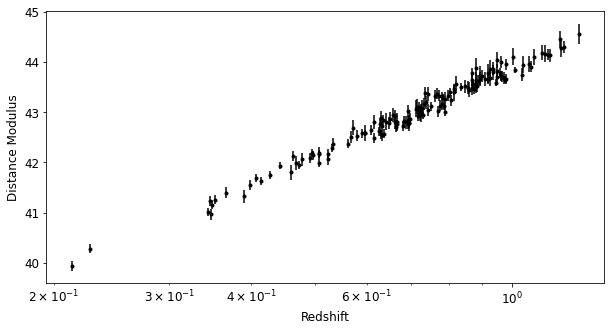

In [ ]:
#Graph

errorbar(zsn, musn, dmusn, fmt='k.')
xscale('log')
xlabel('Redshift')
ylabel('Distance Modulus')

This result is satisfactory and seems quite relevant in terms of uncertainties

We can compare it to canonical models (namely the flat one, the open one, and the lcdm one) to question the relevance of our results.

Text(0, 0.5, 'Distance Modulus')

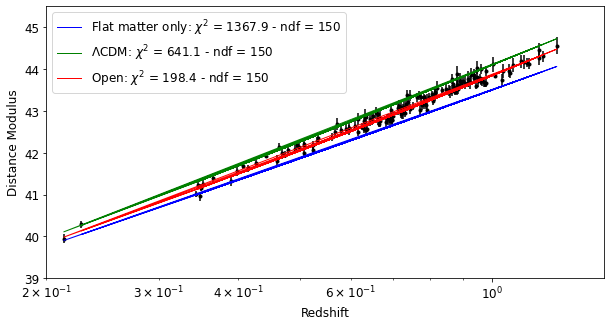

In [ ]:
cosmo_lcdm = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.7, 'w0':-1.}
cosmo_flat = {'h':0.7, 'omega_M_0':1.0, 'omega_lambda_0':0.0, 'w0':-1.}
cosmo_open = {'h':0.7, 'omega_M_0':0.3, 'omega_lambda_0':0.0, 'w0':-1.}

### Calling cs.mus1a()
#mu_flat = 5*np.log10(cs.lumdist(zsn, cosmo_flat)*1e6)-5
mu_lcdm = cs.musn1a(zsn, cosmo_lcdm)
mu_flat = cs.musn1a(zsn, cosmo_flat)
mu_open = cs.musn1a(zsn, cosmo_open)

### Chi2 calculation
chi2_flat = np.sum( (musn - mu_flat)**2/dmusn**2)
chi2_lcdm = np.sum( (musn - mu_lcdm)**2/dmusn**2)
chi2_open = np.sum( (musn - mu_open)**2/dmusn**2)

errorbar(zsn, musn, yerr=dmusn, fmt='k.', zorder=1)

plot(zsn, mu_flat, lw=1, color='blue',
     label='Flat matter only: $\chi^2$ = {0:5.1f} - ndf = {1:}'.format(chi2_flat,len(zsn)), zorder=2)
plot(zsn, mu_lcdm, lw=1, color='green',
     label='$\Lambda$CDM: $\chi^2$ = {0:5.1f} - ndf = {1:}'.format(chi2_lcdm,len(zsn)), zorder=3)
plot(zsn, mu_open, lw=1, color='red',
     label='Open: $\chi^2$ = {0:5.1f} - ndf = {1:}'.format(chi2_open,len(zsn)), zorder=4)

legend()
xscale('log')
xlim(2e-1,1.5)
ylim(39,45.5)
xlabel('Redshift')
ylabel('Distance Modulus')

### **V. Determination of cosmological constants**

Thanks to extracted results from data, we are able to approach the real values of the cosmological parameters we were looking for.

 [-----------------100%-----------------] 80000 of 80000 complete in 62.0 sec

/content/cosmolib.py:326: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  bla=np.histogram(chain[var],bins=nbins,normed=True)
/content/cosmolib.py:326: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  bla=np.histogram(chain[var],bins=nbins,normed=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a prev

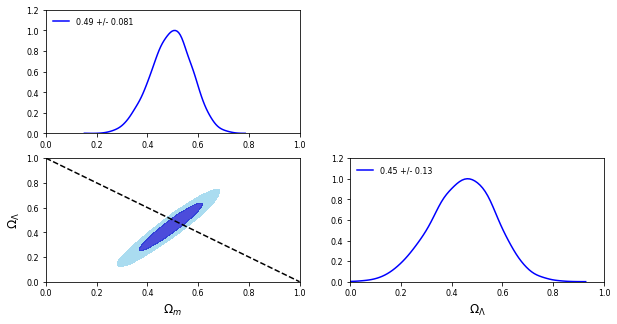

In [ ]:
def newmusn(x, pars):
  cosmo = {'h':pars[0], 'omega_M_0':pars[1],
           'omega_lambda_0':pars[2], 'w0':pars[3]}
  val = cs.musn1a(x, cosmo)
  val[isnan(val)] = -1e30
  return val

data = cs.Data(xvals=np.array(zsn), yvals=np.array(musn), errors=np.array(dmusn), model=newmusn)

chainomol = cs.run_mcmc(data, allvariables=['h','om', 'ol','w'],
                        fitvariables=['om','ol'],
                        fidvalues = np.array([0.7, 0.3, 0.7, -1]))

sm=3
cs.matrixplot(chainomol, ['om', 'ol'], 'blue', sm,
              limits = [[0,1], [0,1.]],
              labels=['$\Omega_m$', '$\Omega_\Lambda$'])
subplot(2,2,3)
plot(linspace(0,1,10),1-linspace(0,1,10),'k--')


### **VI. Using SN1 & SN2 Data**

Now we work with the data given by SN1 & SN2 groups : SN1 for the redshift for each supernova and SN2 for the magnitudes at different epoch for each supernova. However our result won't be convenient since SN2 didn't provide the error magnitude.

In [ ]:
magSN2 = []
tSN2 = []

supernova_num = -1

real_mag = open('magnitudes.txt', 'r')
for line in real_mag:
  s=line.strip("\n\r")
  l=s.split(";")

  if l[1] == 'Supernova_Number':
    continue

  if supernova_num != l[1]:
    supernova_num = l[1]
    magSN2.append(magi)
    tSN2.append(timei)

    timei = []
    magi = []
    timei.append(float(l[0]))
    magi.append(float(l[2]))
  
  else :
    timei.append(float(l[0]))
    magi.append(float(l[2]))
  


print(magSN2)


[[74.2998350632163, 26.379806489903594, 26.08287659152203, 26.18526675678463, 26.14342456370344, 26.170582952761308, 26.031335262271583, 26.060451508469995, 26.305352885775193, 26.117340691071185, 26.230608607333313, 26.379405159065065, 26.23880576573194, 26.37147249669296, 26.67377436101721, 26.769807269147492, 26.735812455637273, 26.68817424717624, 26.635562817893174, 26.75716843727745], [71.14398170521955, 25.72417030358711, 25.631798933244617, 25.76046486141911, 25.78774488189336, 25.89923308961025, 25.660767857681197, 25.59997784581036, 25.84900534430033, 25.659476694428783, 25.862153702409504, 25.83990280098397, 25.86923180774158, 26.050968744785976, 26.13344310152935, 26.482189538995875, 26.51514657325787, 26.583629140437665, 26.278069785348592, 26.509431822362444], [70.03797172335483, 24.47929544949169, 24.38325138526141, 24.411717693088338, 24.498719056419702, 24.441601326454304, 24.440440933792754, 24.52798577037543, 24.71553537224191, 24.785151966444182, 24.893776582169277, 

In [ ]:
redshift = []
df = []
redshift = []
for i in range(0,5):
  df.append(pd.read_excel (r'Data-Search-SNe.xlsx', sheet_name='Data-Search-Field-{}'.format(i)) )
  for x in df[i].itertuples():
    redshift.append(x.Redshift)

print(redshift)

[0.79, 1.17, 1.01, 1.06, 0.73, 0.8, 0.25, 0.55, 0.73, 0.66, 0.36, 1.44, 0.75, 0.51, 0.71, 0.62, 0.97, 1.17, 0.61, 0.93, 0.74, 0.87, 1.09, 0.57, 0.73, 0.89, 0.5, 0.55, 0.93, 0.64, 0.75, 0.55, 1.29, 0.38, 0.6, 0.98, 1.15, 1.21, 0.99, 0.6, 1.28, 0.9, 1.4, 0.49, 0.29, 0.6, 1.49, 1.49, 1.55, 1.68, 1.54, 0.32, 0.32, 0.2, 1.12, 0.35, 0.29, 0.52, 1.0, 0.85, 0.77, 0.37, 1.09, 0.43, 0.73, 1.01, 0.53, 0.77, 1.13, 2.47, 0.82, 1.24, 1.14, 0.75, 1.2, 0.98, 0.91, 1.36, 1.22, 0.27, 0.95, 0.44, 0.8, 0.11, 0.28, 1.21, 1.15, 0.73, 0.76, 0.52, 0.55, 0.61, 0.82, 1.41, 1.84, 1.68, 1.65, 1.56, 1.58, 1.19, 0.49, 0.94, 1.09, 0.42, 0.76, 0.98, 1.3, 0.66, 0.99, 0.98, 1.18, 1.12, 0.31, 1.12, 1.35, 0.75, 0.98, 0.41, 0.78, 0.7, 1.05, 1.15, 0.43, 0.64, 1.31, 0.88, 0.5, 0.39, 0.49, 1.11, 0.88, 0.43, 0.47, 0.71, 0.81, 1.52, 1.09, 1.29, 0.81, 1.41, 0.15, 1.19, 0.82, 0.79, 1.05, 1.4, 1.53, 1.55, 0.41, 0.36, 0.13, 0.98, 0.92, 0.76, 1.15, 0.86, 0.65, 0.76, 0.65, 0.75, 0.36, 0.74, 0.41, 1.16, 0.19, 0.82, 0.04, 0.43, 0.79, 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

0.79


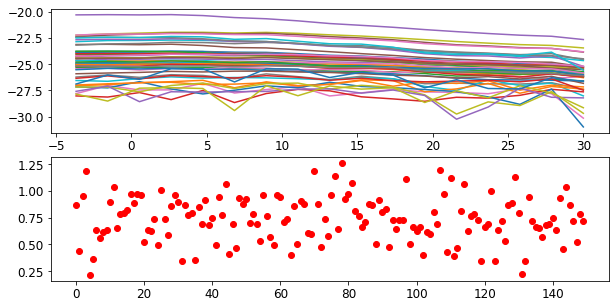

In [ ]:
#Affichage des données brutes : 

magSN2 = np.array(magSN2)
tSN2 = np.array(timeSN2)

subplot(4,1,1)
ylabel('Apparent magnitude')
  
subplot(4,1,2)
ylabel('Error on magnitude')

xlabel('Time in Supernova referential frame')

subplot(4,1,3)
ylabel('Magnitude + error')

xlabel('Time in referential frame')

subplot(4,1,4)
xlabel('Supernova number')
ylabel('Redshift')



for i in range(100,151):
  subplot(2,1,1)
  plot(tSN2[i][3:], -np.array(magSN2[i][3:]))

z = np.loadtxt('Data-LightCurves/EI2019-Data-LightCurves-SN-Redshifts.txt')
subplot(2,1,2)
plot(z, 'ro')

print(redshiftSN2[0] )

In [ ]:
#Approximation avec scipy

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

result_optSN2=200*[0]
result_min=[]
error = []

j = 200 #Number of supernovas to fit

def fun_to_fit(x, par0, par1, par2):
  return (par0 - lc(x-par2, par1, redshiftSN2[i]) ) #Par0 : distance modulus, par1 : scale factor, par2 : time at maximum

for i in range(50, j):
  result_optSN2[i]= (curve_fit(fun_to_fit, tSN2[i][3:], -np.array(magSN2[i][3:])))
  
  print("Supernova n°{}".format(i))
  print("Parameters value (distance modulus, scale factor, time at maximum) : ")
  print(result_optSN2[i][0])
  print("Covariance matrix with parameters in the same order : ")
  print(result_optSN2[i][1])


Supernova n°50
Parameters value (distance modulus, scale factor, time at maximum) : 
[-44.93235205   1.04112772  -1.66420845]
Covariance matrix with parameters in the same order : 
[[ 0.04681554 -0.03282311  0.83235311]
 [-0.03282311  0.02423829 -0.65931675]
 [ 0.83235311 -0.65931675 20.26785089]]
Supernova n°51
Parameters value (distance modulus, scale factor, time at maximum) : 
[-42.57509044   1.11447353   2.32614048]
Covariance matrix with parameters in the same order : 
[[ 0.00093906 -0.00048347  0.0047776 ]
 [-0.00048347  0.00027542 -0.003332  ]
 [ 0.0047776  -0.003332    0.0655105 ]]
Supernova n°52
Parameters value (distance modulus, scale factor, time at maximum) : 
[-47.26729442   2.05874207  -0.84911737]
Covariance matrix with parameters in the same order : 
[[ 0.35373864 -0.24103992  3.0232307 ]
 [-0.24103992  0.16612846 -2.15458917]
 [ 3.0232307  -2.15458917 32.01426958]]
Supernova n°53
Parameters value (distance modulus, scale factor, time at maximum) : 
[-53.0377663    4.

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Supernova n°123
Parameters value (distance modulus, scale factor, time at maximum) : 
[-43.3592857    1.11955607  -0.5639625 ]
Covariance matrix with parameters in the same order : 
[[ 0.00312782 -0.00196201  0.03279309]
 [-0.00196201  0.00138927 -0.02751403]
 [ 0.03279309 -0.02751403  0.69169245]]
Supernova n°124
Parameters value (distance modulus, scale factor, time at maximum) : 
[-38.73453227   0.51655331  -0.6961671 ]
Covariance matrix with parameters in the same order : 
[[ 2.99706974e-04 -6.67321970e-05  2.91838664e-04]
 [-6.67321970e-05  3.53270130e-05 -1.11500326e-03]
 [ 2.91838664e-04 -1.11500326e-03  6.30943587e-02]]
Supernova n°125
Parameters value (distance modulus, scale factor, time at maximum) : 
[-43.65114004   1.05989808   4.03119618]
Covariance matrix with parameters in the same order : 
[[ 0.00730623 -0.00418797  0.05526777]
 [-0.00418797  0.00251792 -0.03632969]
 [ 0.05526777 -0.03632969  0.72518046]]
Supernova n°126
Parameters value (distance modulus, scale factor

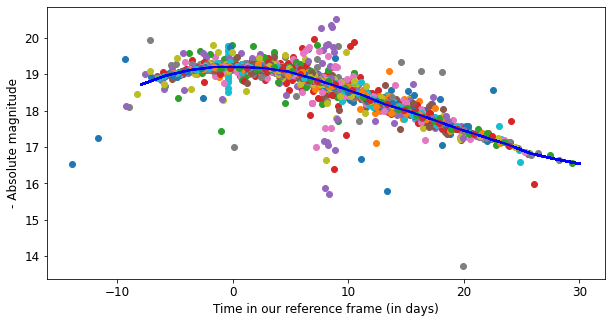

In [ ]:

for i in range(50, 200 ):
  if i == 138 or i == 68 or i == 94 or i == 106 or i == 120 or i == 74:
    continue
  t_corrSN2 = (tSN2[i][3:]-result_optSN2[i][0][2])/((redshiftSN2[i]+1)*(result_optSN2[i][0][1])) #Time corrected for redshift, scale and time at maximum effects of the supernovae
  mag_corrSN2 = -np.array(magSN2[i][3:])-result_optSN2[i][0][0] - 1.52*(result_optSN2[i][0][1]-1) #Magnitude corrected for redshift, scale and time at maximum effects of the supernovae

  #We inverse here the relation to plot the apparent curves on the absolute mean curve

  plot(t_corrSN2 , mag_corrSN2, 'o')

  plt.xlabel('Time in our reference frame (in days)')
  plt.ylabel('- Absolute magnitude')

  #We also plot the curve of the average magnitude

  plot(tSN2[i][1:], -lc(tSN2[i], 1)[1:], 'b' , linewidth = 1.9)


Ces résultats semblent concluants.

L'on ne dispose pas des incertitudes réelles sur les résultats et l'estimation des constantes cosmologiques est, par conséquent, compliquée.